In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import cv2
import random
from PIL import Image

In [2]:
height = 64
width = 64
blank_image = np.ones((height,width,3), np.uint8) * 255
c=4

In [3]:
color_list = [(255,0,0),(0,255,0),(0,0,255)]
figure_list = ['CIRCLE','SQUARE','TRIANGLE']
color_dict = {'RED':(255,0,0),'GREEN':(0,255,0),'BLUE':(0,0,255)}
color_label_dict = {'RED':10, 'GREEN':20, 'BLUE':30}
shape_label_dict = {'CIRCLE':10, 'SQUARE':20, 'TRIANGLE':30}

label_dict = {'CIRCLE_RED':10, 'CIRCLE_GREEN':20, 'CIRCLE_BLUE':30,
             'SQUARE_RED':40, 'SQUARE_GREEN':50, 'SQUARE_BLUE':60,
             'TRIANGLE_RED':70, 'TRIANGLE_GREEN':80, 'TRIANGLE_BLUE':90}


In [4]:
def draw_shapes(img, random_figure, random_color, pts):
    x = pts[0]
    y = pts[1]
    if random_figure == 'SQUARE':
        img = cv2.rectangle(img,(x-c,y-c),(x+c, y+c),random_color,-1)
    elif random_figure == 'TRIANGLE':
        pt1 = (x-c, y+c)
        pt2 = (x+c, y+c)
        pt3 = (x, y-c)
        triangle_cnt = np.array([pt1, pt2, pt3])
        img = cv2.drawContours(img, [triangle_cnt], 0,random_color, -1)
    elif random_figure == 'CIRCLE':
        img = cv2.circle(img, (x,y), c,random_color,-1)
    else :
        print("Invalid choice of figure(or may be invalid color)")
        return None
    return img


def draw_labels_shapes(shape_label, random_figure, random_color, pts):
    x = pts[0]
    y = pts[1]
    if random_figure == 'SQUARE':
        shape_label = cv2.rectangle(shape_label,(x-c,y-c),(x+c, y+c), 
                                    (shape_label_dict[random_figure],0,0),-1)
    elif random_figure == 'TRIANGLE':
        pt1 = (x-c, y+c)
        pt2 = (x+c, y+c)
        pt3 = (x, y-c)
        triangle_cnt = np.array([pt1, pt2, pt3])
        shape_label = cv2.drawContours(shape_label, [triangle_cnt], 0, 
                                       (shape_label_dict[random_figure],0,0), -1)
    elif random_figure == 'CIRCLE':
        shape_label = cv2.circle(shape_label, (x,y), c, 
                                 (shape_label_dict[random_figure],0,0) ,-1)
    else :
        print("Invalid choice of figure(or may be invalid color)")
        return None
    return shape_label


def draw_label_colors(color_label, random_figure, random_color, pts):
    x = pts[0]
    y = pts[1]
    if random_figure == 'SQUARE':
        color_label = cv2.rectangle(color_label,(x-c,y-c),(x+c, y+c), 
                                    (color_label_dict[random_color],0,0),-1)
    elif random_figure == 'TRIANGLE':
        pt1 = (x-c, y+c)
        pt2 = (x+c, y+c)
        pt3 = (x, y-c)
        triangle_cnt = np.array([pt1, pt2, pt3])
        color_label = cv2.drawContours(color_label, [triangle_cnt], 0, 
                                       (color_label_dict[random_color],0,0), -1)
    elif random_figure == 'CIRCLE':
        color_label = cv2.circle(color_label, (x,y), c, (color_label_dict[random_color],0,0),-1)
    else :
        print("Invalid choice of figure(or may be invalid color)")
        return None
    return color_label



def draw_labels(label, random_figure, random_color, pts):
    x = pts[0]
    y = pts[1]
    if random_figure == 'SQUARE':
        label = cv2.rectangle(label,(x-c,y-c),(x+c, y+c), 
                                    (label_dict[random_figure+'_'+random_color],0,0),-1)
    elif random_figure == 'TRIANGLE':
        pt1 = (x-c, y+c)
        pt2 = (x+c, y+c)
        pt3 = (x, y-c)
        triangle_cnt = np.array([pt1, pt2, pt3])
        label = cv2.drawContours(label, [triangle_cnt], 0, 
                                       (label_dict[random_figure+'_'+random_color],0,0), -1)
    elif random_figure == 'CIRCLE':
        label = cv2.circle(label, (x,y), c, 
                           (label_dict[random_figure+'_'+random_color],0,0),-1)
    else :
        print("Invalid choice of figure(or may be invalid color)")
        return None
    return label
    

In [5]:
def draw_random_figure(img):
    #random_number = random.choice([1,2])
    random_number = 2
    random_color = random.choice(color_list)
    random_figure = random.choice(figure_list)
    if random_number==1:
        x, y = np.random.randint(c, img.shape[1]-c, size=(2))
        img = draw_shapes(img, random_figure, random_color, (x,y))
        print(random_color)
        print(random_figure)
        print(x, y)
        
    if random_number==2:
        x = np.random.randint(c, img.shape[1]-c, size=(1))
        #x = c+4
        y = np.random.randint(c, img.shape[0]/2-c, size=(1))
        #y = int(img.shape[0]/2-c)
        draw_shapes(img, random_figure, random_color, (x,y))
        print(random_color)
        print(random_figure)
        print(x, y)
        
        random_color = random.choice(color_list)
        random_figure = random.choice(figure_list)
        x = np.random.randint(c, img.shape[1]-c, size=(1))
        #x = c + 4
        y = np.random.randint(img.shape[0]/2 + c + 2, img.shape[0]-c, size=(1))
        #y = int(img.shape[0]/2 + c +2)
        draw_shapes(img, random_figure, random_color, (x,y))
        print(random_color)
        print(random_figure)
        print(x, y)
    
    
    return img
    

In [6]:
colors = ['RED', 'GREEN', 'BLUE']
shapes = ['SQUARE', 'TRIANGLE', 'CIRCLE']

In [7]:
from itertools import combinations_with_replacement
from itertools import product

In [8]:
comb_colors = combinations_with_replacement(colors, 2)


In [9]:
perm_colors = product(colors, repeat=2)

In [10]:
comb_shapes = combinations_with_replacement(shapes, 2)

In [11]:
classes = list(product(perm_colors, comb_shapes))

In [12]:
for i, a_class in enumerate(classes):
    print(i, a_class)

0 (('RED', 'RED'), ('SQUARE', 'SQUARE'))
1 (('RED', 'RED'), ('SQUARE', 'TRIANGLE'))
2 (('RED', 'RED'), ('SQUARE', 'CIRCLE'))
3 (('RED', 'RED'), ('TRIANGLE', 'TRIANGLE'))
4 (('RED', 'RED'), ('TRIANGLE', 'CIRCLE'))
5 (('RED', 'RED'), ('CIRCLE', 'CIRCLE'))
6 (('RED', 'GREEN'), ('SQUARE', 'SQUARE'))
7 (('RED', 'GREEN'), ('SQUARE', 'TRIANGLE'))
8 (('RED', 'GREEN'), ('SQUARE', 'CIRCLE'))
9 (('RED', 'GREEN'), ('TRIANGLE', 'TRIANGLE'))
10 (('RED', 'GREEN'), ('TRIANGLE', 'CIRCLE'))
11 (('RED', 'GREEN'), ('CIRCLE', 'CIRCLE'))
12 (('RED', 'BLUE'), ('SQUARE', 'SQUARE'))
13 (('RED', 'BLUE'), ('SQUARE', 'TRIANGLE'))
14 (('RED', 'BLUE'), ('SQUARE', 'CIRCLE'))
15 (('RED', 'BLUE'), ('TRIANGLE', 'TRIANGLE'))
16 (('RED', 'BLUE'), ('TRIANGLE', 'CIRCLE'))
17 (('RED', 'BLUE'), ('CIRCLE', 'CIRCLE'))
18 (('GREEN', 'RED'), ('SQUARE', 'SQUARE'))
19 (('GREEN', 'RED'), ('SQUARE', 'TRIANGLE'))
20 (('GREEN', 'RED'), ('SQUARE', 'CIRCLE'))
21 (('GREEN', 'RED'), ('TRIANGLE', 'TRIANGLE'))
22 (('GREEN', 'RED'), ('TRIANG

In [13]:
classes.remove((('GREEN', 'BLUE'), ('CIRCLE', 'CIRCLE')))
classes.remove((('GREEN', 'BLUE'), ('SQUARE', 'SQUARE')))
classes.remove((('GREEN', 'BLUE'), ('TRIANGLE', 'TRIANGLE')))

classes.remove((('BLUE', 'RED'), ('CIRCLE', 'CIRCLE')))
classes.remove((('BLUE', 'RED'), ('SQUARE', 'SQUARE')))
classes.remove((('BLUE', 'RED'), ('TRIANGLE', 'TRIANGLE')))

classes.remove((('GREEN', 'RED'), ('CIRCLE', 'CIRCLE')))
classes.remove((('GREEN', 'RED'), ('SQUARE', 'SQUARE')))
classes.remove((('GREEN', 'RED'), ('TRIANGLE', 'TRIANGLE')))


In [14]:
for i, a_class in enumerate(classes):
    print(i, a_class)

0 (('RED', 'RED'), ('SQUARE', 'SQUARE'))
1 (('RED', 'RED'), ('SQUARE', 'TRIANGLE'))
2 (('RED', 'RED'), ('SQUARE', 'CIRCLE'))
3 (('RED', 'RED'), ('TRIANGLE', 'TRIANGLE'))
4 (('RED', 'RED'), ('TRIANGLE', 'CIRCLE'))
5 (('RED', 'RED'), ('CIRCLE', 'CIRCLE'))
6 (('RED', 'GREEN'), ('SQUARE', 'SQUARE'))
7 (('RED', 'GREEN'), ('SQUARE', 'TRIANGLE'))
8 (('RED', 'GREEN'), ('SQUARE', 'CIRCLE'))
9 (('RED', 'GREEN'), ('TRIANGLE', 'TRIANGLE'))
10 (('RED', 'GREEN'), ('TRIANGLE', 'CIRCLE'))
11 (('RED', 'GREEN'), ('CIRCLE', 'CIRCLE'))
12 (('RED', 'BLUE'), ('SQUARE', 'SQUARE'))
13 (('RED', 'BLUE'), ('SQUARE', 'TRIANGLE'))
14 (('RED', 'BLUE'), ('SQUARE', 'CIRCLE'))
15 (('RED', 'BLUE'), ('TRIANGLE', 'TRIANGLE'))
16 (('RED', 'BLUE'), ('TRIANGLE', 'CIRCLE'))
17 (('RED', 'BLUE'), ('CIRCLE', 'CIRCLE'))
18 (('GREEN', 'RED'), ('SQUARE', 'TRIANGLE'))
19 (('GREEN', 'RED'), ('SQUARE', 'CIRCLE'))
20 (('GREEN', 'RED'), ('TRIANGLE', 'CIRCLE'))
21 (('GREEN', 'GREEN'), ('SQUARE', 'SQUARE'))
22 (('GREEN', 'GREEN'), ('SQUA

In [54]:
import _pickle as cPickle

In [55]:
cPickle.dump(classes, open('classes.pkl', 'wb'))

In [56]:
new_classes = cPickle.load(open('classes.pkl', 'rb'))

In [57]:
assert classes==new_classes


In [58]:
len(new_classes)

45

In [59]:
def create_class_images(class_tuple, img):
    shape_label = np.zeros((img.shape[0],img.shape[1],3), np.uint8) 
    color_label = np.zeros((img.shape[0],img.shape[1],3), np.uint8) 
    label = np.zeros((img.shape[0],img.shape[1],3), np.uint8) 
    
    colors, shapes = class_tuple
    
    x = np.random.randint(c, img.shape[1]-c, size=(1))
    y = np.random.randint(c, img.shape[0]/2-c, size=(1))
    draw_shapes(img, shapes[0], color_dict[colors[0]], (x,y))
    draw_labels_shapes(shape_label, shapes[0], colors[0], (x,y))
    draw_label_colors(color_label, shapes[0], colors[0], (x,y))
    draw_labels(label, shapes[0], colors[0], (x,y))

    x = np.random.randint(c, img.shape[1]-c, size=(1))
    y = np.random.randint(img.shape[0]/2 + c + 2, img.shape[0]-c, size=(1))
    draw_shapes(img, shapes[1], color_dict[colors[1]], (x,y))
    draw_labels_shapes(shape_label, shapes[1], colors[1], (x,y))
    draw_label_colors(color_label, shapes[1], colors[1], (x,y))
    draw_labels(label, shapes[1], colors[1], (x,y))
    
    return img, shape_label, color_label, label

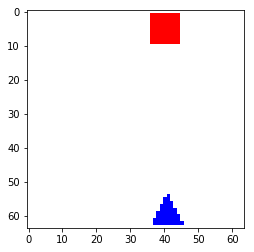

In [60]:
img = np.ones((height,width,3), np.uint8) * 255
img, shape_label, color_label, label = create_class_images(new_classes[13],img)
plt.imshow(img)
plt.show()

In [61]:
np.unique(img.reshape(-1, img.shape[2]), axis=0)

array([[  0,   0, 255],
       [255,   0,   0],
       [255, 255, 255]], dtype=uint8)

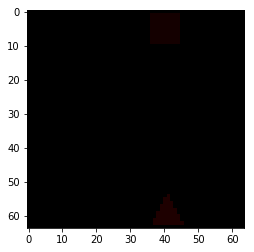

the unique labels: 
 [[ 0  0  0]
 [20  0  0]
 [30  0  0]]
shape of the label  (64, 64, 3)


In [62]:
plt.imshow(shape_label)
plt.show()
print("the unique labels: \n", np.unique(shape_label.reshape(-1, shape_label.shape[2]), axis=0))
print("shape of the label ", shape_label.shape)

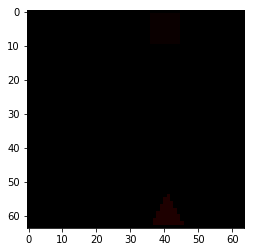

the unique labels: 
 [[ 0  0  0]
 [10  0  0]
 [30  0  0]]
shape of the label  (64, 64, 3)


In [63]:
plt.imshow(color_label)
plt.show()
print("the unique labels: \n", np.unique(color_label.reshape(-1, color_label.shape[2]), axis=0))
print("shape of the label ", color_label.shape)

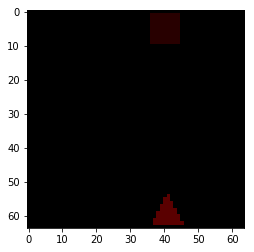

the unique labels: 
 [[ 0  0  0]
 [40  0  0]
 [90  0  0]]
shape of the label  (64, 64, 3)


In [64]:
plt.imshow(label)
plt.show()
print("the unique labels: \n", np.unique(label.reshape(-1, label.shape[2]), axis=0))
print("shape of the label ", label.shape)